In [ ]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
import pandas as pd 


torch.set_printoptions(edgeitems=2, linewidth=75)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
housing = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/ColabNotebooks/HW1ac/HW2 RL/Housing.csv")) 
housing.head() 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] 
def binary_map(x): 
    return x.map({'yes': 1, "no": 0}) 
 
# Applying the function to the housing list 
housing[varlist] = housing[varlist].apply(binary_map) 
 
# Check the housing dataframe now 
housing.head() 


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
from sklearn.model_selection import train_test_split 
 
# We specify this so that the train and test data set always have the same rows, respec
np.random.seed(0) 
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 0)



In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars] 
Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'] 
df_Newtrain = df_train[num_vars] 
df_Newtest = df_test[num_vars] 
df_Newtrain.head() 

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [ ]:
df_Newtest

,area,bedrooms,bathrooms,stories,parking,price
239,4000,3,1,2,1,4585000
113,9620,3,1,1,2,6083000
325,3460,4,1,2,0,4007500
66,13200,2,1,1,1,6930000
479,3660,4,1,2,0,2940000
...,...,...,...,...,...,...
76,6420,3,2,3,0,6650000
132,5200,3,1,3,0,5810000
311,6060,2,1,1,1,4123000
464,4500,2,1,2,1,3080000


In [ ]:
import warnings 
warnings.filterwarnings('ignore') 
 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
 
# define standard scaler 
#scaler = StandardScaler() 
scaler = MinMaxScaler() 
df_Newtrain[num_vars] = scaler.fit_transform(df_Newtrain[num_vars]) 
df_Newtest[num_vars] = scaler.fit_transform(df_Newtest[num_vars])
df_Newtrain.head(20) 

,area,bedrooms,bathrooms,stories,parking,price
542,0.124199,0.2,0.0,0.000000,0.000000,0.000000
496,0.150654,0.2,0.0,0.000000,0.000000,0.081818
484,0.083821,0.2,0.0,0.000000,0.000000,0.096970
507,0.122807,0.2,0.0,0.000000,0.000000,0.072727
252,0.558619,0.4,0.0,0.000000,0.000000,0.239394
263,0.148427,0.4,0.0,0.333333,0.000000,0.230303
240,0.139515,0.4,0.0,0.333333,0.333333,0.245455
175,0.554442,0.6,0.5,0.333333,0.666667,0.303030
385,0.125592,0.2,0.0,0.000000,0.000000,0.157576
374,0.117238,0.2,0.5,0.000000,0.000000,0.163636


In [ ]:
y_Newtrain = df_Newtrain.pop('price') 
X_Newtrain = df_Newtrain
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest

In [ ]:
y_Newtrain

542    0.000000
496    0.081818
484    0.096970
507    0.072727
252    0.239394
         ...   
70     0.436364
277    0.221212
9      0.696970
359    0.169697
192    0.284848
Name: price, Length: 436, dtype: float64

In [ ]:
import torch 

x = torch.tensor(np.array(X_Newtrain), dtype=torch.float)
y = torch.tensor(np.array(y_Newtrain).reshape(-1, 1), dtype=torch.float)
xval = torch.tensor(np.array(X_Newtest), dtype=torch.float)
yval = torch.tensor(np.array(y_Newtest), dtype=torch.float)

In [ ]:



import torch
import torch.nn as nn
from collections import OrderedDict


seq_model = nn.Sequential(
    nn.Linear(5, 8),
    nn.Tanh(),
    nn.Linear(8, 1))

              
            

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")

In [ ]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
  n_epochs = 200,
  optimizer = optimizer,
  model = seq_model,
  loss_fn = nn.MSELoss(),
  t_u_train = x,
  t_u_val = xval,
  t_c_train = y,
  t_c_val = yval)


# print('output', seq_model(xval))
# print('answer', yval)
# print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 0.2887, Validation loss 0.3236


In [ ]:
#1 part two:

import torch
import torch.nn as nn
from collections import OrderedDict

Seq_model2 = nn.Sequential(
    nn.Linear(5, 8),
    nn.Linear(8,4),
    nn.Linear(4,2),
    nn.Tanh(),
    nn.Linear(2, 1))


In [ ]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
  n_epochs = 200,
  optimizer = optimizer,
  model = Seq_model2,
  loss_fn = nn.MSELoss(),
  t_u_train = x,
  t_u_val = xval,
  t_c_train = y,
  t_c_val = yval)

Epoch 1, Training loss 1.0192, Validation loss 1.0807


In [ ]:
#2 CIFAR DATASET PYTORCH:
from torchvision import transforms 
from torchvision import datasets
data_path = '/content/drive/MyDrive/ColabNotebooks/HW1ac/HW2 RL'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))


In [ ]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

TypeError: ignored

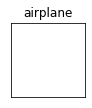

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [ ]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim

correct = 0
total = 0

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 128),
            nn.Tanh(),
            nn.Linear(128, 10),
            nn.LogSoftmax(dim = 1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 300

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs,dim=1)

        total += labels.shape[0]
        correct += int((predicted == labels).sum())


    print("Epoch: %d, Loss: %f" % (epoch, float(loss)), "Accuracy %" , (correct/total))

Epoch: 0, Loss: 2.039693 Accuracy % 0.36924
Epoch: 1, Loss: 1.759591 Accuracy % 0.39317
Epoch: 2, Loss: 2.075019 Accuracy % 0.4076066666666667
Epoch: 3, Loss: 1.587446 Accuracy % 0.419075
Epoch: 4, Loss: 1.657420 Accuracy % 0.428808
Epoch: 5, Loss: 1.386487 Accuracy % 0.4369033333333333
Epoch: 6, Loss: 1.294329 Accuracy % 0.4440485714285714
Epoch: 7, Loss: 1.460901 Accuracy % 0.4504025
Epoch: 8, Loss: 1.503702 Accuracy % 0.45666666666666667
Epoch: 9, Loss: 1.476095 Accuracy % 0.462488
Epoch: 10, Loss: 1.361540 Accuracy % 0.4679527272727273
Epoch: 11, Loss: 1.822329 Accuracy % 0.4732366666666667
Epoch: 12, Loss: 1.016111 Accuracy % 0.47840307692307693
Epoch: 13, Loss: 1.660213 Accuracy % 0.48331285714285716
Epoch: 14, Loss: 1.128972 Accuracy % 0.488052
Epoch: 15, Loss: 1.442574 Accuracy % 0.4926625
Epoch: 16, Loss: 1.304295 Accuracy % 0.4970670588235294
Epoch: 17, Loss: 1.549951 Accuracy % 0.5014566666666667
Epoch: 18, Loss: 1.081633 Accuracy % 0.5056663157894736
Epoch: 19, Loss: 1.9390

In [45]:
correct = 0
total = 0

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=True)

with torch.no_grad():
     for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        
        
        _, predicted = torch.max(outputs,dim=1)

        total += labels.shape[0]
        correct += int((predicted == labels).sum())


print("Accuracy %" , (correct/total))

Accuracy % 0.9984


In [46]:
valua_load =  torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                           shuffle=True)

totalV = 0
correctV = 0


with torch.no_grad():

    for imgs, labels in valua_load:
        outputsV = model(imgs.view(imgs.shape[0], -1))
       
        _, predictedV = torch.max(outputsV,dim=1)

        totalV += labels.shape[0]
        correctV += int((predictedV == labels).sum())


    print("Epoch: %d, Loss: %f" % (epoch, float(loss)), "Accuracy %" , (correct/total))

Epoch: 299, Loss: 0.029963 Accuracy % 0.9984


In [47]:
import torch
import torch.nn as nn
import torch.optim as optim


train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Linear(512,128),
            nn.Linear(128,64),
            nn.Tanh(),
            nn.Linear(64, 10),
            nn.LogSoftmax(dim = 1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 300

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.845504
Epoch: 1, Loss: 1.715722
Epoch: 2, Loss: 1.425304
Epoch: 3, Loss: 1.624738
Epoch: 4, Loss: 1.722234
Epoch: 5, Loss: 1.723444
Epoch: 6, Loss: 2.050299
Epoch: 7, Loss: 1.188566
Epoch: 8, Loss: 1.578212
Epoch: 9, Loss: 2.057919
Epoch: 10, Loss: 1.826598
Epoch: 11, Loss: 1.435429
Epoch: 12, Loss: 2.102652
Epoch: 13, Loss: 1.649956
Epoch: 14, Loss: 1.265642
Epoch: 15, Loss: 1.063742
Epoch: 16, Loss: 1.802483
Epoch: 17, Loss: 1.708883
Epoch: 18, Loss: 1.027849
Epoch: 19, Loss: 1.393992
Epoch: 20, Loss: 1.965154
Epoch: 21, Loss: 1.572131
Epoch: 22, Loss: 1.377181
Epoch: 23, Loss: 1.166149
Epoch: 24, Loss: 1.700582
Epoch: 25, Loss: 1.666935
Epoch: 26, Loss: 1.180207
Epoch: 27, Loss: 0.817448
Epoch: 28, Loss: 1.092508
Epoch: 29, Loss: 0.846074
Epoch: 30, Loss: 1.411262
Epoch: 31, Loss: 1.169727
Epoch: 32, Loss: 1.810684
Epoch: 33, Loss: 1.311038
Epoch: 34, Loss: 1.423379
Epoch: 35, Loss: 1.499421
Epoch: 36, Loss: 1.092114
Epoch: 37, Loss: 1.408782
Epoch: 38, Loss: 1.292

In [48]:
correct = 0
total = 0

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64,
                                           shuffle=True)

with torch.no_grad():
     for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        
        
        _, predicted = torch.max(outputs,dim=1)

        total += labels.shape[0]
        correct += int((predicted == labels).sum())


print("Accuracy %" , (correct/total))

Accuracy % 0.80552


In [49]:
valua_load =  torch.utils.data.DataLoader(cifar10_val, batch_size=64,
                                           shuffle=True)

totalV = 0
correctV = 0


with torch.no_grad():

    for imgs, labels in valua_load:
        outputsV = model(imgs.view(imgs.shape[0], -1))
       
        _, predictedV = torch.max(outputsV,dim=1)

        totalV += labels.shape[0]
        correctV += int((predictedV == labels).sum())


    print("Epoch: %d, Loss: %f" % (epoch, float(loss)), "Accuracy %" , (correct/total))

Epoch: 299, Loss: 0.872731 Accuracy % 0.80552
